# EDA (Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâÌïòÍ∏∞)

1. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

- Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ÌïòÍ∏∞

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

 - 59Í∞úÏùò ÌîºÏ≤ò(Ïó¥)Í∞Ä ÏûàÏúºÎ©∞, idÏôÄ targetÏùÑ Ï†úÏô∏ÌïòÎ©¥ 57Í∞úÏùò ÌîºÏ≤òÍ∞Ä ÏûàÏùå
 - Ï¥ù 595,212 ÌñâÏù¥ ÏûàÏúºÎ©∞, Í≤∞Ï∏°ÏπòÎäî -1 Î°ú ÌëúÌòÑÎêòÏñ¥ ÏûàÏùå
 - Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÎ≥ÑÎ°ú ÎÇòÎà† Î¥êÏïºÍ≤†Îã§

#### **Ïª¨Îüº ÏÑ§Î™Ö**
ps_
- Porto Seguro (Î≥¥ÌóòÏÇ¨ Ïù¥Î¶Ñ) ÏïΩÏûê

ind (individual)
- Í∞úÏù∏(ÌîºÎ≥¥ÌóòÏûê)Ïùò Ïù∏Íµ¨ÌÜµÍ≥ÑÌïôÏ†Å ÌäπÏÑ± (ÎÇòÏù¥, ÏÑ±Î≥Ñ, Í∞ÄÏ°±Í¥ÄÍ≥Ñ Îì±)

reg (region)
- ÏßÄÏó≠ Í¥ÄÎ†® Î≥ÄÏàò (Í±∞Ï£ºÏßÄ, Îì±Î°ùÏßÄ Îì±)

car (car/vehicle)
- Ï∞®Îüâ ÌäπÏÑ±Í≥º Í¥ÄÎ†®Îêú Î≥ÄÏàò

calc (calculated features)
- Î≥¥ÌóòÏÇ¨ ÎÇ¥Î∂Ä Í≥ÑÏÇ∞ÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú ÌååÏÉù Î≥ÄÏàò (Î¶¨Ïä§ÌÅ¨ Ï†êÏàò, ÎÇ¥Î∂Ä Ïä§ÏΩîÏñ¥ÎßÅ Îì±)

cat (categorical)
- Î≤îÏ£ºÌòï Î≥ÄÏàò (Ïòà: ÏÉâÏÉÅ, Ï¢ÖÎ•ò, Îì±Í∏â Îì±)

bin (binary)
- Ïù¥ÏßÑ Î≥ÄÏàò (0/1, Ïòà: Yes/No, True/False)

In [4]:
# ÌîºÏ≤ò Ïú†ÌòïÎ≥ÑÎ°ú ÎÇòÎàÑÍ∏∞
all_features = train.columns.drop(['id', 'target'])

# Ïù¥ÏßÑÌòï(binary) ÌîºÏ≤ò
bin_features = [col for col in all_features if col.endswith('_bin')]

# Î≤îÏ£ºÌòï(categorical) ÌîºÏ≤ò
cat_features = [col for col in all_features if col.endswith('_cat')]

# ÏàòÏπòÌòï(continuous) ÎòêÎäî ÏàúÏÑúÌòï(ordinal) ÌîºÏ≤ò
# _bin, _cat Ï†ëÎØ∏ÏÇ¨Í∞Ä ÏóÜÍ≥†, id, targetÏù¥ ÏïÑÎãå ÌîºÏ≤ò
numeric_features = [col for col in all_features if not (col.endswith('_bin') or col.endswith('_cat'))]
print(f"Ïù¥ÏßÑÌòï ÌîºÏ≤ò ({len(bin_features)}Í∞ú): {bin_features}")
print(f"Î≤îÏ£ºÌòï ÌîºÏ≤ò ({len(cat_features)}Í∞ú): {cat_features}")
print(f"ÏàòÏπòÌòï/ÏàúÏÑúÌòï ÌîºÏ≤ò ({len(numeric_features)}Í∞ú): {numeric_features}")

Ïù¥ÏßÑÌòï ÌîºÏ≤ò (17Í∞ú): ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
Î≤îÏ£ºÌòï ÌîºÏ≤ò (14Í∞ú): ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
ÏàòÏπòÌòï/ÏàúÏÑúÌòï ÌîºÏ≤ò (26Í∞ú): ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


- Í≤∞Ï∏°Í∞í ÌôïÏù∏ÌïòÍ∏∞

In [5]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col]== -1)
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: {col}ÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù {missing_values}Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.')
            missing_col.append(col)

missing_col = check_missing_col(train)

Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_ind_02_catÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù 216Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_ind_04_catÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù 83Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_ind_05_catÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù 5809Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_reg_03ÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù 107772Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_car_01_catÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù 107Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_car_02_catÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù 5Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_car_03_catÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù 411231Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_car_05_catÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏóê Ï¥ù 266551Í∞úÏùò Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌîºÏ≤òÎäî: ps_car_07_catÏûÖÎãàÎã§, Ìï¥Îãπ Ïª¨ÎüºÏ

- ÏãúÍ∞ÅÌôî ÌÜµÌï¥ÏÑú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÌïòÍ∏∞

Target=0 (No Claim): 573518 (96.36%)
Target=1 (Claim): 21694 (3.64%)


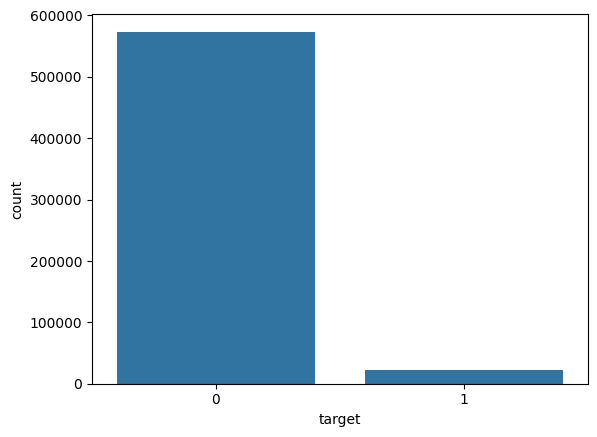

In [6]:
# ÌÉÄÍ≤üÍ∞í Î∂ÑÌè¨ ÌôïÏù∏
target_count = train['target'].value_counts()
print(f"Target=0 (No Claim): {target_count[0]} ({target_count[0] / len(train) * 100:.2f}%)")
print(f"Target=1 (Claim): {target_count[1]} ({target_count[1] / len(train) * 100:.2f}%)")

sns.countplot(x='target', data=train)
plt.show()

- ÏïàÏ†Ñ Ïö¥Ï†ÑÏûêÏùò ÎπÑÏú®Ïù¥ ÏïΩ 94% ÎÇò ÎêòÎäî Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ ÏÖã
- Ï†ïÌôïÎèÑ(Accuracy)Ïùò Ìï®Ï†ï: ÎßåÏïΩ Î™®Îç∏Ïù¥ Î™®Îì† Ïö¥Ï†ÑÏûêÏóê ÎåÄÌï¥ "Î≥¥Ìóò Ï≤≠Íµ¨Î•º ÌïòÏßÄ ÏïäÎäîÎã§(Target=0)"ÎùºÍ≥†Îßå ÏòàÏ∏°Ìï¥ÎèÑ, Ï†ïÌôïÎèÑÎäî 96.36%Í∞Ä ÎÇòÏòµÎãàÎã§.
     ÏàòÏπòÎäî ÎÜíÏïÑ Î≥¥Ïù¥ÏßÄÎßå, Ï†ïÏûë Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°Ìï¥Ïïº Ìï† 'Î≥¥Ìóò Ï≤≠Íµ¨'Îäî Îã® ÌïòÎÇòÎèÑ ÎßûÏ∂îÏßÄ Î™ªÌïòÎäî Î¨¥Ïö©ÏßÄÎ¨º Î™®Îç∏Ïù¥ Îê©ÎãàÎã§.

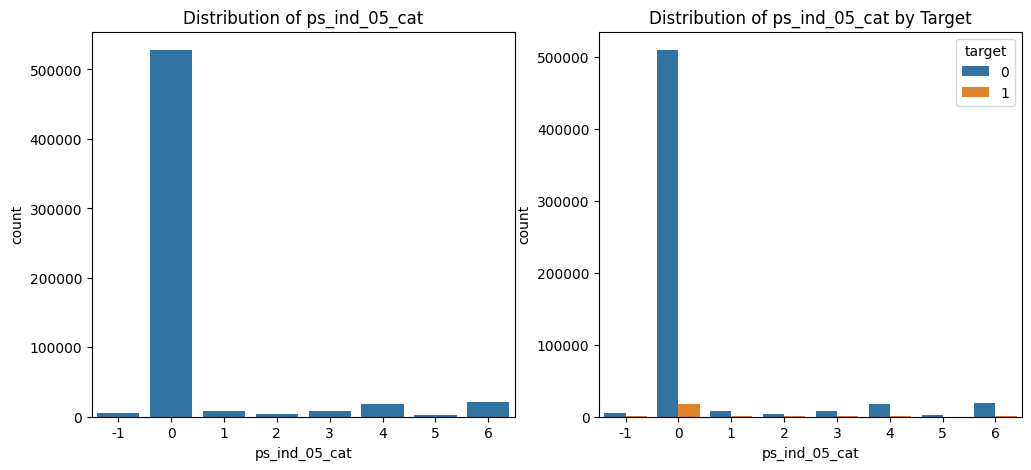

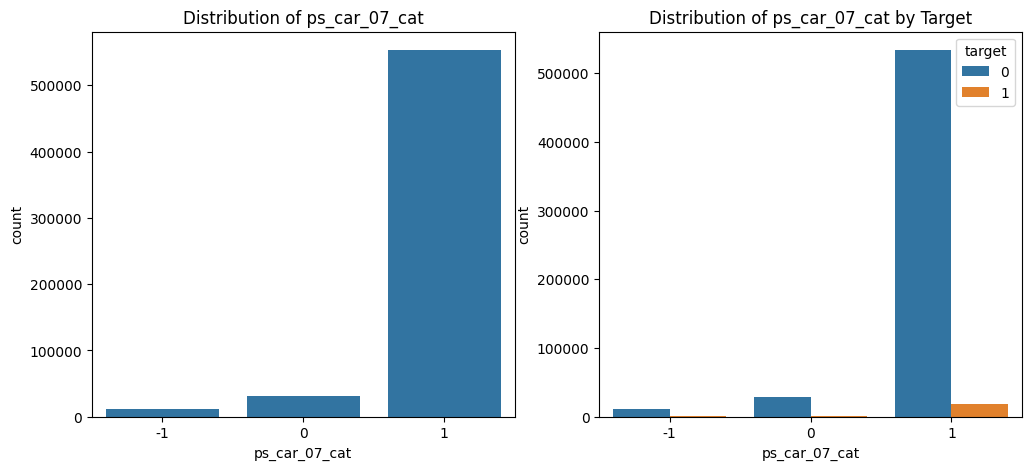

In [7]:
# ÌÉÄÍ≤üÍ∞íÏóê Îî∞Î•∏ Î≤îÏ£ºÌòï ÌîºÏ≤ò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_categorical_features(feature_name):
  plt.figure(figsize=(12, 5))

  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò Î∂ÑÌè¨
  plt.subplot(1, 2, 1)
  sns.countplot(x=feature_name, data=train)
  plt.title(f'Distribution of {feature_name}')

  # ÌÉÄÍ≤üÍ∞íÏóê Îî∞Î•∏ Î∂ÑÌè¨
  plt.subplot(1, 2, 2)
  sns.countplot(x=feature_name, hue='target', data=train)
  plt.title(f'Distribution of {feature_name} by Target')
  plt.show()

# ÏòàÏãú ÌîºÏ≤ò ÏãúÍ∞ÅÌôî
plot_categorical_features('ps_ind_05_cat')
plot_categorical_features('ps_car_07_cat')

# Í¥ÄÏã¨ÏûàÎäî Îã§Î•∏ Î≤îÏ£ºÌòï ÌîºÏ≤òÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî.
# plot_categorical_features('ps_car_04_cat')

/tmp/ipython-input-4122583505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 0, feature_name], label='Target 0', color='blue')
/tmp/ipython-input-4122583505.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 1, feature_name], label=

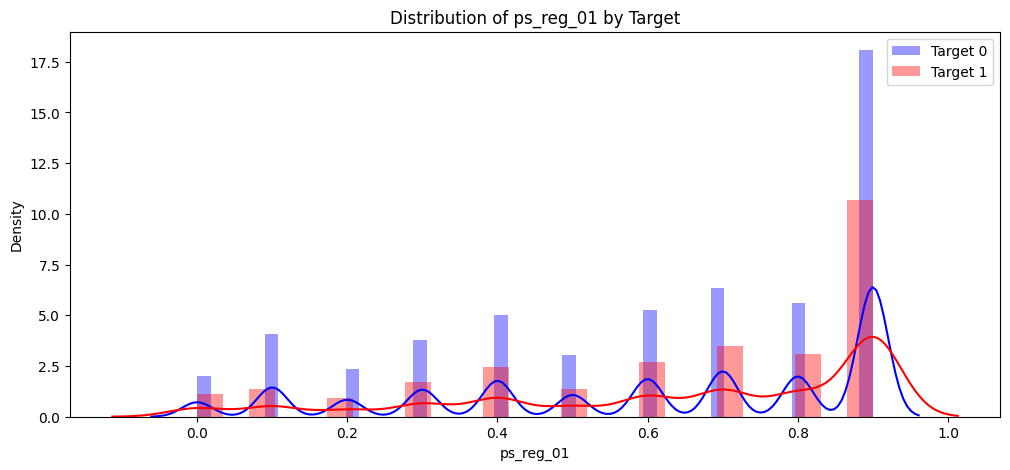

/tmp/ipython-input-4122583505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 0, feature_name], label='Target 0', color='blue')
/tmp/ipython-input-4122583505.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 1, feature_name], label=

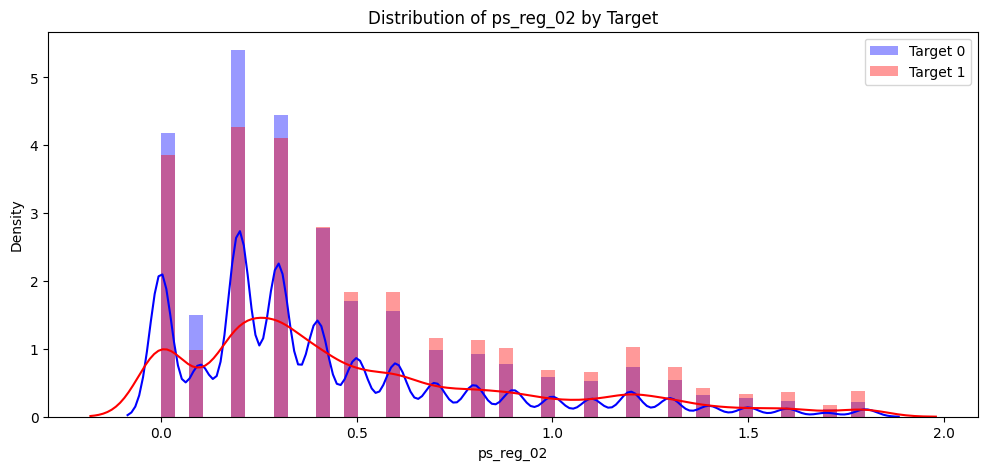

/tmp/ipython-input-4122583505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 0, feature_name], label='Target 0', color='blue')
/tmp/ipython-input-4122583505.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 1, feature_name], label=

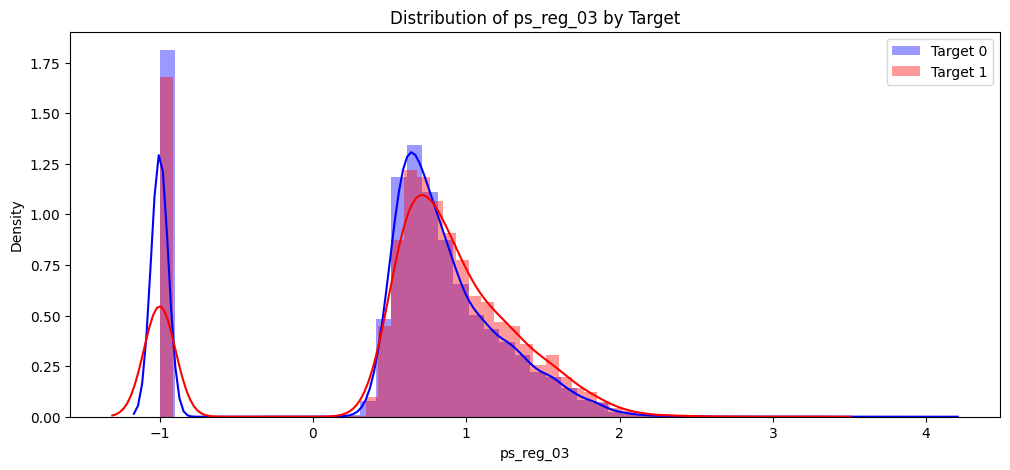

In [8]:
# ÌÉÄÍ≤üÍ∞íÏóê Îî∞Î•∏ ÏàòÏπòÌòï ÌîºÏ≤ò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_numerical_features(feature_name):
    plt.figure(figsize=(12, 5))

    # ÌÉÄÍ≤üÍ∞íÏù¥ 0Ïù∏ Í≤ΩÏö∞Ïùò Î∂ÑÌè¨
    sns.distplot(train.loc[train['target'] == 0, feature_name], label='Target 0', color='blue')

    # ÌÉÄÍ≤üÍ∞íÏù¥ 1Ïù∏ Í≤ΩÏö∞Ïùò Î∂ÑÌè¨
    sns.distplot(train.loc[train['target'] == 1, feature_name], label='Target 1', color='red')
    plt.title(f'Distribution of {feature_name} by Target')
    plt.legend()
    plt.show()

# ÏòàÏãú ÌîºÏ≤ò ÏãúÍ∞ÅÌôî
plot_numerical_features('ps_reg_01')
plot_numerical_features('ps_reg_02')
plot_numerical_features('ps_reg_03') # Í≤∞Ï∏°ÏπòÍ∞Ä Ï†úÏùº ÎßéÏïòÎçò ÌîºÏ≤ò

Target=0Í≥º Target=1Ïùò Î∂ÑÌè¨ Î™®ÏñëÏù¥ ÎßéÏù¥ Îã§Î•¥Î©¥ ‚Üí Ìï¥Îãπ ÌîºÏ≤òÍ∞Ä Î∂ÑÎ•òÏóê Ïú†Ïö©Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå

Îëê Î∂ÑÌè¨Í∞Ä Í±∞Ïùò Í≤πÏπòÎ©¥ ‚Üí ÌîºÏ≤ò Îã®ÎèÖÏúºÎ°úÎäî Íµ¨Î∂ÑÎ†•Ïù¥ Îñ®Ïñ¥Ïßê

ÏúÑÏùò Ïù¥ÎØ∏ÏßÄÏ§ë reg03ÏùÄ?
- Í≤∞Ï∏° Ïó¨Î∂Ä ÏûêÏ≤¥Í∞Ä Ï§ëÏöîÌïú ÌîºÏ≤òÏùº Í∞ÄÎä•ÏÑ±

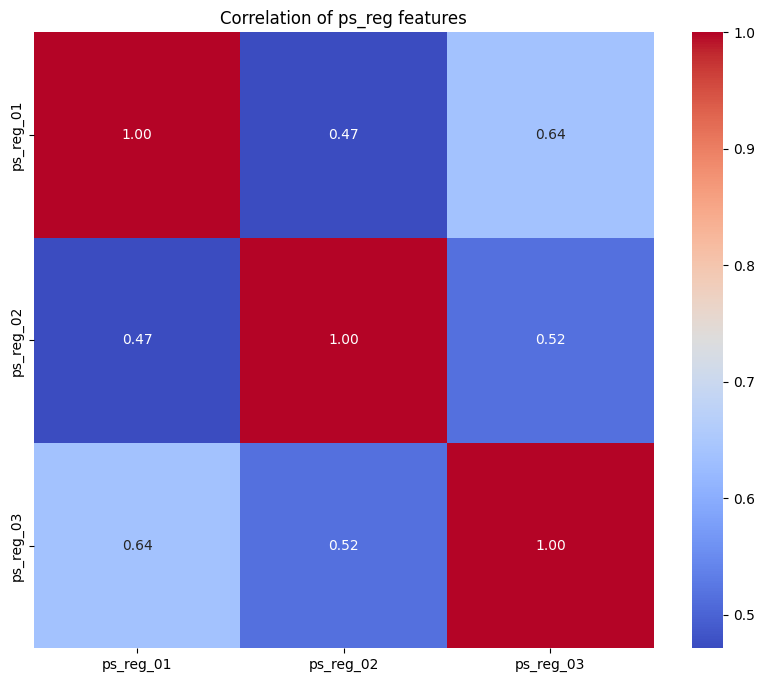

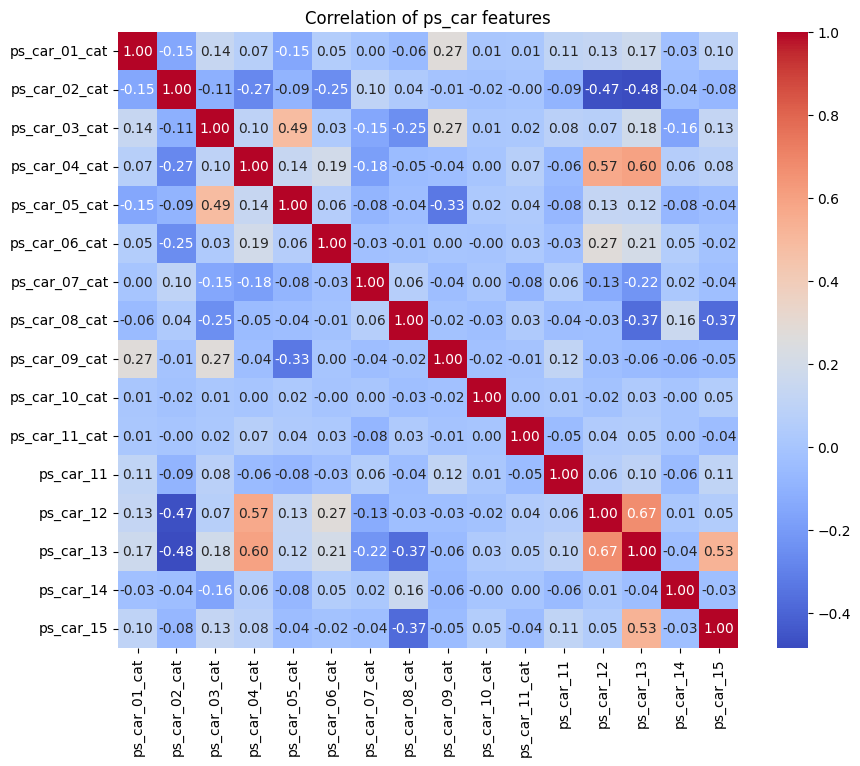

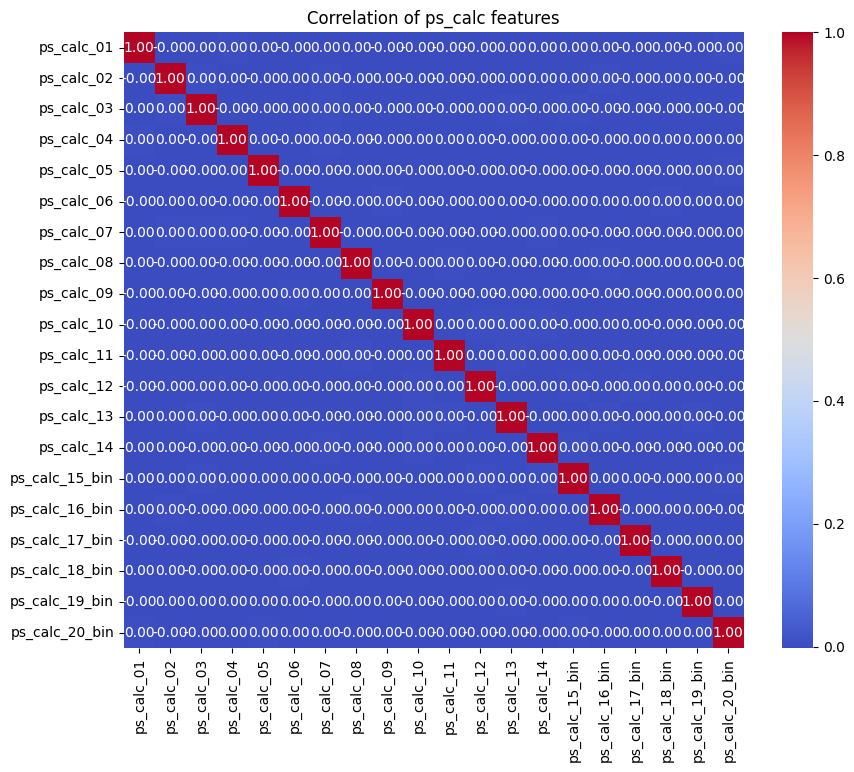

In [9]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_correlation_heatmap(features, title):
    corr = train[features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(title)
    plt.show()

# ps_reg ÌîºÏ≤ò Í∑∏Î£π
reg_features = [col for col in all_features if 'ps_reg' in col]
plot_correlation_heatmap(reg_features, 'Correlation of ps_reg features')

# ps_car ÌîºÏ≤ò Í∑∏Î£π (ÏàòÏπòÌòïÎßå)
car_numerical_features = [col for col in all_features if 'ps_car' in col]
plot_correlation_heatmap(car_numerical_features, 'Correlation of ps_car features')

# ps_calc ÌîºÏ≤ò Í∑∏Î£π (ÏàòÏπòÌòïÎßå)
calc_numerical_features = [col for col in all_features if 'ps_calc' in col]
plot_correlation_heatmap(calc_numerical_features, 'Correlation of ps_calc features')

calc Î≥ÄÏàòÎì§Ïù¥ Í∞ÅÍ∞Å ÎèÖÎ¶ΩÏ†ÅÏù¥Í∏¥ ÌïòÏßÄÎßå, Ïã§Ï†ú ÏòàÏ∏° Í∏∞Ïó¨ÎèÑÎäî ÎÇÆÏïÑÎ≥¥ÏûÑ.

### Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏ Í∞úÎ∞ú
 - LightGBM
 - ÏÑ±Îä• Ï¢ãÏúºÎ©¥ÏÑú Í∞ÄÎ≤ºÏõå Kaggle ÎåÄÌöåÏóêÏÑú Ïù∏Í∏∞Í∞Ä ÎßéÏùå
 - Í≥ºÍ∞êÌïòÍ≤å Í≤∞Ï∏°ÏπòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏùÄ featureÎ•º Ï†úÍ±∞ÌñàÏùå.

1. ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import roc_auc_score

In [16]:
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# ÌõàÎ†®, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Î∂àÎü¨Ïò§Í∏∞ (ÌòπÏãú Î™®Î•¥Îãà)
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
sample_submission = pd.read_csv('sample_submission.csv', index_col='id')

# EDAÏóêÏÑú ÏñªÏùÄ Í∞ÄÏÑ§ÏùÑ Î∞îÌÉïÏúºÎ°ú Î∂àÌïÑÏöîÌïú ÌîºÏ≤ò Ï†úÍ±∞
# ps_calc_* ÌîºÏ≤òÎì§ÏùÄ Ï†ïÎ≥¥Î†•Ïù¥ Í±∞Ïùò ÏóÜÏúºÎØÄÎ°ú Ï†úÍ±∞
calc_features = [col for col in train.columns if 'calc' in col]

# Í≤∞Ï∏°ÏπòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏùÄ ÌîºÏ≤ò Ï†úÍ±∞
high_missing_features = ['ps_car_03_cat', 'ps_car_05_cat']
features_to_drop = calc_features + high_missing_features
train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)

# -1ÏùÑ NaNÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ÌïòÍ∏∞ ÏâΩÍ≤å ÎßåÎì¶
train = train.replace(-1, np.nan)
test = test.replace(-1, np.nan)

# ÎÇ®ÏùÄ Î≤îÏ£ºÌòï ÌîºÏ≤òÎì§Ïóê ÎåÄÌï¥ Í∞ÑÎã®Ìïú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥)
# LightGBMÏùÄ NaNÏùÑ Ïä§Ïä§Î°ú Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏßÄÎßå, Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùÑ Ïàò ÏûàÏùå
cat_features = [col for col in train.columns if col.endswith('_cat')]
for col in cat_features:
    mode_val = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val)
    test[col] = test[col].fillna(mode_val)

# ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ ÌîºÏ≤ò Î∂ÑÎ¶¨
X = train.drop(columns=['target'])
y = train['target']

In [6]:
# 2. ÌèâÍ∞ÄÏßÄÌëú Î∞è Î™®Îç∏ ÏÑ§Ï†ï
# ÏßÄÎãà Í≥ÑÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def gini(y_true, y_pred):
    # (y_true, y_pred)Î•º y_pred ÏàúÏúºÎ°ú Ï†ïÎ†¨
    sorted_by_pred = sorted(zip(y_true, y_pred), key=lambda x: x[1])
    y_true_sorted = [x[0] for x in sorted_by_pred]

    n = len(y_true_sorted)
    cum_y_true = np.cumsum(y_true_sorted)
    # Î°úÎ†åÏ∏† Í≥°ÏÑ†‰∏ãÈù¢ÁßØ
    lorentz_area = np.sum(cum_y_true) / np.sum(y_true_sorted)
    # ÏßÄÎãà Í≥ÑÏàò
    gini_coef = (lorentz_area - (n + 1) / 2) / n
    return gini_coef

def normalized_gini(y_true, y_pred):
    return gini(y_true, y_pred) / gini(y_true, y_true)

# StratifiedKFold ÏÑ§Ï†ï
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# LightGBM Î™®Îç∏ ÏÑ§Ï†ï
lgbm = LGBMClassifier(objective='binary',
                      metric='auc',
                      n_estimators=1000, # ÎÑâÎÑâÌïòÍ≤å ÏÑ§Ï†ï, Ï°∞Í∏∞ Ï¢ÖÎ£å ÏÇ¨Ïö©
                      learning_rate=0.05,
                      num_leaves=31,
                      max_depth=-1,
                      random_state=42)

In [13]:
# 3. ÍµêÏ∞® Í≤ÄÏ¶ù Î∞è ÌõàÎ†®
oof_preds = np.zeros(len(train))
test_preds = np.zeros(len(test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ ÌõàÎ†®
    lgbm.fit(X_train, y_train,
             eval_set=[(X_val, y_val)],
             eval_metric='auc',
             callbacks=[
                 # 100Î≤à ÎèôÏïà Í≤ÄÏ¶ù Ï†êÏàòÍ∞Ä Ìñ•ÏÉÅÎêòÏßÄ ÏïäÏúºÎ©¥ ÌõàÎ†® Ï§ëÏßÄ
                 early_stopping(100, verbose=False)
             ])

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    val_preds = lgbm.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (5Í∞ú Ìè¥ÎìúÏùò ÏòàÏ∏°ÏùÑ ÌèâÍ∑†ÎÉÑ)
    test_preds += lgbm.predict_proba(test)[:, 1] / skf.n_splits

# Ï†ÑÏ≤¥ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏßÄÎãà Í≥ÑÏàò Í≥ÑÏÇ∞
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== OOF Gini Score: {gini_score:.6f} =====")

===== Fold 1 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
===== Fold 2 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 476169, numb

In [14]:
# 4. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = sample_submission.copy()
submission['target'] = test_preds
submission.to_csv('baseline_submission.csv')

print("\n'baseline_submission.csv' has been created successfully!")


'baseline_submission.csv' has been created successfully!


In [15]:
baseline_submission = pd.read_csv('baseline_submission.csv')
baseline_submission

id    target
0             0  0.027882
1             1  0.026419
2             2  0.028039
3             3  0.015537
4             4  0.037303
...         ...       ...
892811  1488022  0.097838
892812  1488023  0.041086
892813  1488024  0.040409
892814  1488025  0.023752
892815  1488026  0.030480

[892816 rows x 2 columns]

In [16]:
len(test)

892816

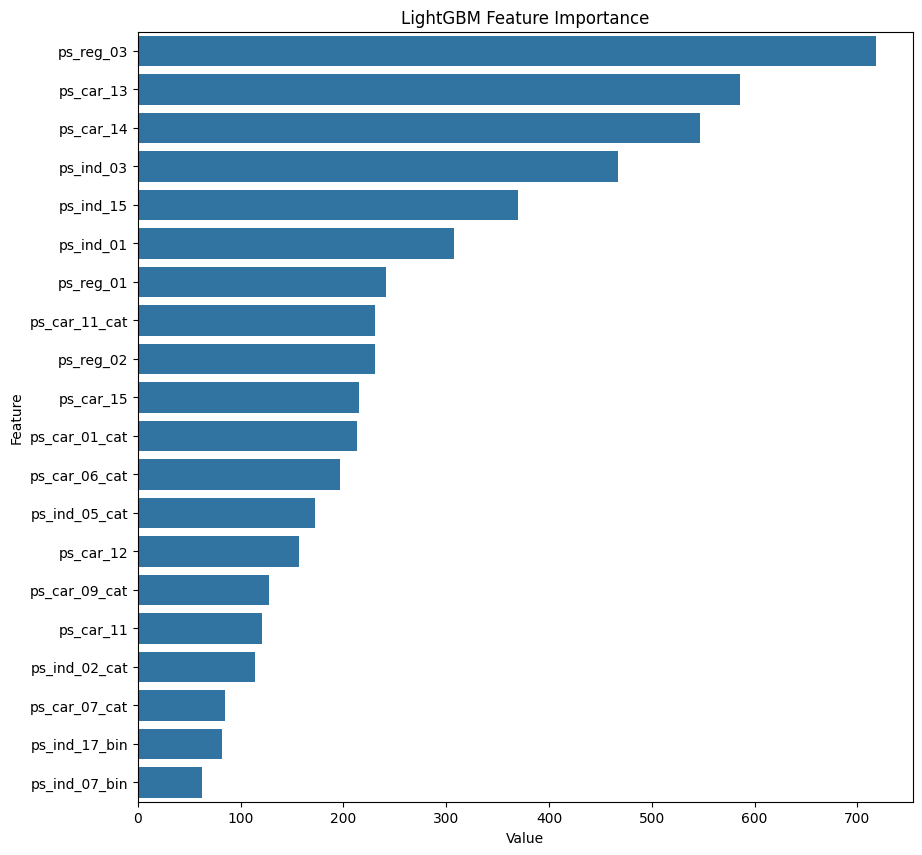

In [17]:
# ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
def plot_feature_importance(model, features, num=20):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(num))
    plt.title('LightGBM Feature Importance')
    plt.show()

# Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏ ÌõàÎ†® ÏΩîÎìú Ïã§Ìñâ ÌõÑ, ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÏÑ∏Ïöî.
# (lgbm Í∞ùÏ≤¥ÏôÄ X Î≥ÄÏàòÍ∞Ä Î©îÎ™®Î¶¨Ïóê ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§)
plot_feature_importance(lgbm, X)

  #### Í∞úÏÑ† ÏïÑÏù¥ÎîîÏñ¥ 1: ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ - Ïõê-Ìï´ Ïù∏ÏΩîÎî© (One-Hot Encoding)


  ÌòÑÏû¨ Ïö∞Î¶¨ Î™®Îç∏ÏùÄ ps_ind_02_cat Í∞ôÏùÄ Î≤îÏ£ºÌòï ÌîºÏ≤òÎ•º Îã®ÏàúÌïú Ïà´Ïûê(1, 2, 3, 4...)Î°ú Ï∑®Í∏âÌïòÍ≥† ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Î™®Îç∏ÏùÄ Ïù¥ Ïà´ÏûêÎì§ÏùÑ ÌÅ¨Í∏∞ÎÇò ÏàúÏÑúÍ∞Ä
  ÏûàÎäî Í∞íÏúºÎ°ú Ïò§Ìï¥Ìï† Ïàò ÏûàÏäµÎãàÎã§(Ïòà: '4Î≤à Î≤îÏ£ºÍ∞Ä 2Î≤à Î≤îÏ£ºÎ≥¥Îã§ Îëê Î∞∞ Îçî Ï§ëÏöîÌïòÎã§'ÎùºÍ≥† ÏûòÎ™ª ÌïôÏäµ).


  Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÄ Ïù¥Îü∞ Ïò§Ìï¥Î•º ÎßâÍ∏∞ ÏúÑÌï¥ Í∞Å Î≤îÏ£º Í∞íÏùÑ ÎèÖÎ¶ΩÏ†ÅÏù∏ ÌîºÏ≤ò(Ïó¥)Î°ú ÎßåÎì§Ïñ¥Ï£ºÎäî Í∏∞Î≤ïÏûÖÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ ps_ind_02_catÏóê [1, 2, 3] ÏÑ∏ Ï¢ÖÎ•òÏùò
  Í∞íÏù¥ ÏûàÏóàÎã§Î©¥, ps_ind_02_cat_1, ps_ind_02_cat_2, ps_ind_02_cat_3 Ïù¥ÎùºÎäî ÏÑ∏ Í∞úÏùò ÏÉàÎ°úÏö¥ ÌîºÏ≤òÎ•º ÎßåÎì§Í≥† Ìï¥ÎãπÌïòÎäî Í≥≥ÏóêÎßå 1, ÎÇòÎ®∏ÏßÄÎäî 0ÏúºÎ°ú
  Ï±ÑÏõÅÎãàÎã§.

In [17]:
# Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ ÏúÑÌï¥ ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
all_data = pd.concat([X, test], axis=0)

# Î≤îÏ£ºÌòï ÌîºÏ≤òÏóê ÎåÄÌï¥ Ïõê-Ìï´ Ïù∏ÏΩîÎî© ÏàòÌñâ
cat_features = [col for col in all_data.columns if col.endswith('_cat')]

# pd.get_dummiesÍ∞Ä ÏûêÎèôÏúºÎ°ú NaNÏù¥ ÏïÑÎãå Î≤îÏ£ºÎßå Ïù∏ÏΩîÎî©Ìï¥Ï§å
all_data = pd.get_dummies(all_data, columns=cat_features, dummy_na=False) # dummy_na=FalseÎäî NaNÏùÑ ÏúÑÌïú Ïó¥ÏùÑ ÎßåÎì§ÏßÄ ÏïäÏùå

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Î∂ÑÎ¶¨
X = all_data.iloc[:len(train)]
test = all_data.iloc[len(train):]

In [19]:
# 3. ÍµêÏ∞® Í≤ÄÏ¶ù Î∞è ÌõàÎ†®
oof_preds = np.zeros(len(train))
test_preds = np.zeros(len(test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ ÌõàÎ†®
    lgbm.fit(X_train, y_train,
             eval_set=[(X_val, y_val)],
             eval_metric='auc',
             callbacks=[
                 # 100Î≤à ÎèôÏïà Í≤ÄÏ¶ù Ï†êÏàòÍ∞Ä Ìñ•ÏÉÅÎêòÏßÄ ÏïäÏúºÎ©¥ ÌõàÎ†® Ï§ëÏßÄ
                 early_stopping(100, verbose=False)
             ])

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    val_preds = lgbm.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (5Í∞ú Ìè¥ÎìúÏùò ÏòàÏ∏°ÏùÑ ÌèâÍ∑†ÎÉÑ)
    test_preds += lgbm.predict_proba(test)[:, 1] / skf.n_splits

# Ï†ÑÏ≤¥ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏßÄÎãà Í≥ÑÏàò Í≥ÑÏÇ∞
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== OOF Gini Score: {gini_score:.6f} =====")

===== Fold 1 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.260110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
===== Fold 2 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.224648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

In [20]:
# 4. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = sample_submission.copy()
submission['target'] = test_preds
submission.to_csv('submission_one_hot.csv')

print("\n'submission_one_hot.csv' has been created successfully!")


'submission_one_hot.csv' has been created successfully!


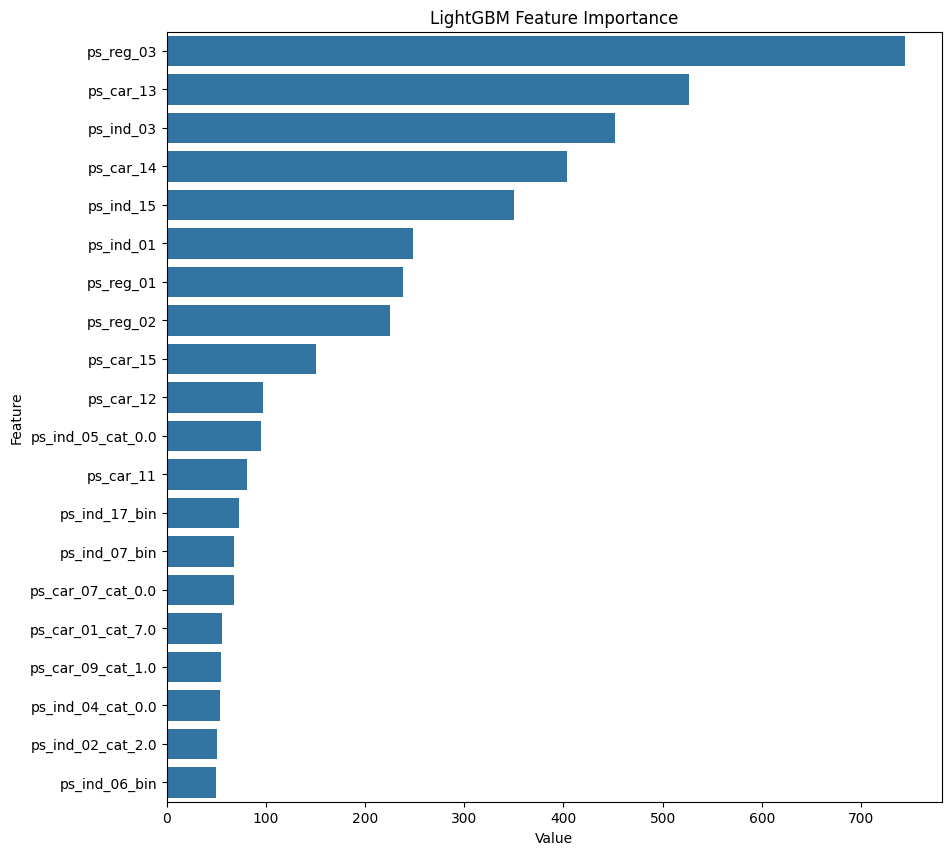

In [21]:
plot_feature_importance(lgbm, X)

  ### Îã§Ïùå ÏÑ±Îä• Í∞úÏÑ† ÏïÑÏù¥ÎîîÏñ¥: ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù


  ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏúºÎ°ú ÌÅ∞ ÏÑ±Í≥µÏùÑ Í±∞ÎëêÏóàÏúºÎãà, Ïù¥Ï†ú Î™®Îç∏ ÏûêÏ≤¥Î•º ÏµúÏ†ÅÌôîÌïòÏó¨ ÏÑ±Îä•ÏùÑ Ìïú Îã®Í≥Ñ Îçî ÎÅåÏñ¥Ïò¨Î†§ Î≥¥Í≤†ÏäµÎãàÎã§. Ï≤¥ÌÅ¨Î¶¨Ïä§Ìä∏Ïùò 'Î™®Îç∏ ÌõàÎ†® with
  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî' Îã®Í≥ÑÏóê Ìï¥ÎãπÌï©ÎãàÎã§.


  ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(Hyperparameter)ÎûÄ, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÌïôÏäµÌïòÎäî Í∞í(ÌååÎùºÎØ∏ÌÑ∞)Ïù¥ ÏïÑÎãàÎùº, Î™®Îç∏Ïù¥ Ïñ¥ÎñªÍ≤å ÌïôÏäµÌï†ÏßÄÎ•º Ïö∞Î¶¨Í∞Ä ÏßÅÏ†ë ÏÑ§Ï†ïÌï¥Ï£ºÎäî
  'ÏÑ§Ï†ïÍ∞í'ÏûÖÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ learning_rate(ÌïôÏäµÎ•†), n_estimators(Ìä∏Î¶¨ Í∞úÏàò) Îì±Ïù¥ Ïó¨Í∏∞Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.


  ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ Ï∞æÏúºÎ©¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∑πÎåÄÌôîÌï† Ïàò ÏûàÏäµÎãàÎã§.

  Í∞úÏÑ† ÏïÑÏù¥ÎîîÏñ¥ 2: Ï£ºÏöî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞í Ï°∞Ï†ï


  ÌòÑÏû¨ Ïö∞Î¶¨Îäî ÎπÑÍµêÏ†Å Í∏∞Î≥∏Ï†ÅÏù∏ ÏÑ§Ï†ïÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. ÏùºÎ∞òÏ†ÅÏù∏ ÏÑ±Îä• Í∞úÏÑ† Ï†ÑÎûµ Ï§ë ÌïòÎÇòÎäî ÌïôÏäµÎ•†(`learning_rate`)ÏùÑ ÎÇÆÏ∂îÍ≥†, ÎåÄÏã† Îçî ÎßéÏùÄ
  Ìä∏Î¶¨(`n_estimators`)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îçî Ï†ïÍµêÌïòÍ≥† ÏïàÏ†ïÏ†ÅÏù∏ Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Í≤ÉÏûÖÎãàÎã§. ÎòêÌïú, Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Í∞Å Ìä∏Î¶¨Î•º ÎßåÎì§ Îïå ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ÏôÄ
  ÌîºÏ≤òÎßå Î¨¥ÏûëÏúÑÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í∏∞Î≤ïÎèÑ Ìö®Í≥ºÏ†ÅÏûÖÎãàÎã§.


In [22]:
# LightGBM Î™®Îç∏ ÏÑ§Ï†ï (ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù)
lgbm = LGBMClassifier(objective='binary',
                      metric='auc',
                      n_estimators=2000,      # Ìä∏Î¶¨Î•º Îçî ÎßéÏù¥ ÎßåÎì¶
                      learning_rate=0.01,     # ÌïôÏäµÎ•†ÏùÑ ÎÇÆÏ∂∞ Îçî Ï†ïÍµêÌïòÍ≤å ÌïôÏäµ
                      num_leaves=31,          # Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
                      max_depth=-1,           # Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
                      subsample=0.7,          # Í∞Å Ìä∏Î¶¨Î•º ÌõàÎ†®Ìï† Îïå Îç∞Ïù¥ÌÑ∞Ïùò 70%Îßå Î¨¥ÏûëÏúÑÎ°ú ÏÇ¨Ïö© (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
                      colsample_bytree=0.7,   # Í∞Å Ìä∏Î¶¨Î•º ÌõàÎ†®Ìï† Îïå ÌîºÏ≤òÏùò 70%Îßå Î¨¥ÏûëÏúÑÎ°ú ÏÇ¨Ïö© (Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
                      random_state=42,
                      n_jobs=-1)              # Î™®Îì† CPU ÏΩîÏñ¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†® ÏÜçÎèÑ Ìñ•ÏÉÅ

In [23]:
# 3. ÍµêÏ∞® Í≤ÄÏ¶ù Î∞è ÌõàÎ†®
oof_preds = np.zeros(len(train))
test_preds = np.zeros(len(test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ ÌõàÎ†®
    lgbm.fit(X_train, y_train,
             eval_set=[(X_val, y_val)],
             eval_metric='auc',
             callbacks=[
                 # 100Î≤à ÎèôÏïà Í≤ÄÏ¶ù Ï†êÏàòÍ∞Ä Ìñ•ÏÉÅÎêòÏßÄ ÏïäÏúºÎ©¥ ÌõàÎ†® Ï§ëÏßÄ
                 early_stopping(100, verbose=False)
             ])

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    val_preds = lgbm.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° (5Í∞ú Ìè¥ÎìúÏùò ÏòàÏ∏°ÏùÑ ÌèâÍ∑†ÎÉÑ)
    test_preds += lgbm.predict_proba(test)[:, 1] / skf.n_splits

# Ï†ÑÏ≤¥ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏßÄÎãà Í≥ÑÏàò Í≥ÑÏÇ∞
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== OOF Gini Score: {gini_score:.6f} =====")

===== Fold 1 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.207024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
===== Fold 2 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

In [24]:
!pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 400.9/400.9 kB 15.0 MB/s eta 0:00:00


In [25]:
import optuna

# --- OptunaÎ•º ÏúÑÌïú Î™©Ï†Å Ìï®Ïàò(Objective Function) Ï†ïÏùò ---
def objective(trial):
    # 1. ÌäúÎãùÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïùò ÌÉêÏÉâ Î≤îÏúÑ Ï†ïÏùò
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'random_state': 42,
        'n_estimators': 2000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'max_depth': trial.suggest_int('max_depth', 5, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 1.0), # L1 Ï†ïÍ∑úÌôî
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0), # L2 Ï†ïÍ∑úÌôî
        'n_jobs': -1,

        # === GPU ÏÑ§Ï†ï ===
        'device': 'gpu',        # GPU ÏÇ¨Ïö©
        'gpu_platform_id': 0,   # (Ïó¨Îü¨ GPU ÏûàÏùÑ Îïå ÏÑ†ÌÉùÏö©, Îã®Ïùº GPUÎ©¥ ÏÉùÎûµ Í∞ÄÎä•)
        'gpu_device_id': 0
    }

    # 2. ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(X))

    # 3. ÍµêÏ∞® Í≤ÄÏ¶ù ÌõàÎ†® Î∞è ÌèâÍ∞Ä
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        model = LGBMClassifier(**params)
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  eval_metric='auc',
                  callbacks=[
                      early_stopping(100, verbose=False)
                  ])
        val_preds = model.predict_proba(X_val)[:, 1]
        oof_preds[val_idx] = val_preds

    # 4. ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†êÏàò(Gini) Í≥ÑÏÇ∞ ÌõÑ Î∞òÌôò
    # (Ïù¥Ï†ÑÏóê Ï†ïÏùòÌïú normalized_gini Ìï®ÏàòÍ∞Ä Î©îÎ™®Î¶¨Ïóê ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§)
    gini_score = normalized_gini(y, oof_preds)
    return gini_score

# --- Optuna Ïä§ÌÑ∞Îîî ÏÉùÏÑ± Î∞è ÏµúÏ†ÅÌôî Ïã§Ìñâ ---
# 'direction="maximize"'Îäî objective Ìï®ÏàòÍ∞Ä Î∞òÌôòÌïòÎäî Ï†êÏàòÎ•º ÏµúÎåÄÌôîÌïòÎäî Î∞©Ìñ•ÏúºÎ°ú ÌÉêÏÉâÌïòÎùºÎäî ÏùòÎØ∏
study = optuna.create_study(direction="maximize")

# 30Î≤àÏùò Îã§Î•∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ ÏãúÎèÑÌïòÏó¨ ÏµúÏ†ÅÏùò Í∞íÏùÑ Ï∞æÏùå
# (ÏãúÍ∞ÑÏù¥ ÏûàÎã§Î©¥ n_trials Í∞íÏùÑ ÎäòÎ†§Î≥¥ÏÑ∏Ïöî)
study.optimize(objective, n_trials=30)

# --- ÏµúÏ†ÅÌôî Í≤∞Í≥º ÌôïÏù∏ ---
print("\n===== Optuna Optimization Finished =====")
print("Best Gini Score:", study.best_value)
print("Best Params:", study.best_params)

[I 2025-09-09 07:54:31,671] A new study created in memory with name: no-name-99ab2e9d-8a8b-4de8-b83e-16c6dcd912a3


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017939 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 07:58:01,063] Trial 0 finished with value: 0.2832269048842434 and parameters: {'learning_rate': 0.01914153429315331, 'num_leaves': 22, 'max_depth': 10, 'subsample': 0.6777261269541873, 'colsample_bytree': 0.7878426442555523, 'reg_alpha': 0.7947933172351738, 'reg_lambda': 0.7473396236664733}. Best is trial 0 with value: 0.2832269048842434.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017936 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 07:59:56,466] Trial 1 finished with value: 0.2840848533033625 and parameters: {'learning_rate': 0.044918635726336524, 'num_leaves': 22, 'max_depth': 9, 'subsample': 0.7251394792331992, 'colsample_bytree': 0.6802635411084286, 'reg_alpha': 0.8388185886308801, 'reg_lambda': 0.7004495580003293}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017910 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:01:27,044] Trial 2 finished with value: 0.2823796152877651 and parameters: {'learning_rate': 0.040428153565534294, 'num_leaves': 32, 'max_depth': 10, 'subsample': 0.6954456086334931, 'colsample_bytree': 0.8258338261503221, 'reg_alpha': 0.04765263023981378, 'reg_lambda': 0.3201498088279837}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017894 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:04:18,484] Trial 3 finished with value: 0.28396110660367324 and parameters: {'learning_rate': 0.023830545188959038, 'num_leaves': 48, 'max_depth': 8, 'subsample': 0.7912073351330359, 'colsample_bytree': 0.6498828083765539, 'reg_alpha': 0.3937340923352412, 'reg_lambda': 0.035049551048389}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.020990 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:07:29,497] Trial 4 finished with value: 0.283827274948702 and parameters: {'learning_rate': 0.020074969089755413, 'num_leaves': 40, 'max_depth': 6, 'subsample': 0.7205601928460361, 'colsample_bytree': 0.7754683171171702, 'reg_alpha': 0.47973973561601424, 'reg_lambda': 0.6798855289662655}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017865 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:09:57,466] Trial 5 finished with value: 0.2829479322079063 and parameters: {'learning_rate': 0.031726255949876304, 'num_leaves': 35, 'max_depth': 5, 'subsample': 0.7276705192567925, 'colsample_bytree': 0.8030757689503202, 'reg_alpha': 0.29476475102840005, 'reg_lambda': 0.8246363489572518}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.023063 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:14:46,545] Trial 6 finished with value: 0.283967769091186 and parameters: {'learning_rate': 0.010468344516817042, 'num_leaves': 45, 'max_depth': 9, 'subsample': 0.6336247180283875, 'colsample_bytree': 0.6505697453926607, 'reg_alpha': 0.19882032489178997, 'reg_lambda': 0.8781625580120852}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017944 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:16:47,444] Trial 7 finished with value: 0.28267571750289455 and parameters: {'learning_rate': 0.03162181356980527, 'num_leaves': 26, 'max_depth': 9, 'subsample': 0.723850420484536, 'colsample_bytree': 0.6614140983215613, 'reg_alpha': 0.5548984846594024, 'reg_lambda': 0.02783119350282721}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018075 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:20:11,160] Trial 8 finished with value: 0.2836759450009549 and parameters: {'learning_rate': 0.017199537833977624, 'num_leaves': 49, 'max_depth': 9, 'subsample': 0.6466264301618371, 'colsample_bytree': 0.628024588482116, 'reg_alpha': 0.08704020057901278, 'reg_lambda': 0.12362139825383964}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018045 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins

[I 2025-09-09 08:23:09,376] Trial 9 finished with value: 0.28420707676296986 and parameters: {'learning_rate': 0.02191472341477991, 'num_leaves': 34, 'max_depth': 6, 'subsample': 0.8032061747898984, 'colsample_bytree': 0.7755158965365303, 'reg_alpha': 0.7622451181960624, 'reg_lambda': 0.7630485926826387}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017799 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:24:54,274] Trial 10 finished with value: 0.2833131637389054 and parameters: {'learning_rate': 0.03763580711362252, 'num_leaves': 30, 'max_depth': 6, 'subsample': 0.8993250630694054, 'colsample_bytree': 0.8893313918156602, 'reg_alpha': 0.9524097546740712, 'reg_lambda': 0.49682560043270246}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017977 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:26:34,863] Trial 11 finished with value: 0.2829083467731971 and parameters: {'learning_rate': 0.046851616076879606, 'num_leaves': 20, 'max_depth': 7, 'subsample': 0.8043561030280043, 'colsample_bytree': 0.714807403090923, 'reg_alpha': 0.7039238940762695, 'reg_lambda': 0.5764074808001494}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018169 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:28:13,791] Trial 12 finished with value: 0.2838349379265344 and parameters: {'learning_rate': 0.04877678854564822, 'num_leaves': 37, 'max_depth': 7, 'subsample': 0.7971731347221295, 'colsample_bytree': 0.7264972184756099, 'reg_alpha': 0.9756483194410883, 'reg_lambda': 0.9177196184134686}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.020027 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:31:25,250] Trial 13 finished with value: 0.28365692443258006 and parameters: {'learning_rate': 0.026337359789701843, 'num_leaves': 28, 'max_depth': 5, 'subsample': 0.8624881515803741, 'colsample_bytree': 0.7033175139710928, 'reg_alpha': 0.7350823649396021, 'reg_lambda': 0.5049580468006023}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.032066 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:33:46,485] Trial 14 finished with value: 0.2839630421602187 and parameters: {'learning_rate': 0.0391172526896788, 'num_leaves': 24, 'max_depth': 8, 'subsample': 0.7704485260762896, 'colsample_bytree': 0.601509474340077, 'reg_alpha': 0.8423197801403023, 'reg_lambda': 0.9961424618062412}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018084 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:38:20,062] Trial 15 finished with value: 0.28358431799490696 and parameters: {'learning_rate': 0.011731406298677017, 'num_leaves': 42, 'max_depth': 6, 'subsample': 0.8407224515894369, 'colsample_bytree': 0.8426606303200125, 'reg_alpha': 0.6256279960732583, 'reg_lambda': 0.6707058798097404}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.026352 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:39:59,197] Trial 16 finished with value: 0.2839953730756275 and parameters: {'learning_rate': 0.04384318342766458, 'num_leaves': 34, 'max_depth': 8, 'subsample': 0.7589410638129546, 'colsample_bytree': 0.7471294684099924, 'reg_alpha': 0.8523438295556882, 'reg_lambda': 0.35973394380780377}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.051328 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 17355, number of negative: 4588

[I 2025-09-09 08:42:11,028] Trial 17 finished with value: 0.2840894384553352 and parameters: {'learning_rate': 0.03437959018079788, 'num_leaves': 39, 'max_depth': 7, 'subsample': 0.6064200235022984, 'colsample_bytree': 0.6762979011867356, 'reg_alpha': 0.6360905166722806, 'reg_lambda': 0.7626779712524485}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018017 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:44:45,742] Trial 18 finished with value: 0.2835907525429478 and parameters: {'learning_rate': 0.026644740074740006, 'num_leaves': 39, 'max_depth': 7, 'subsample': 0.6000362338404548, 'colsample_bytree': 0.7502371574358446, 'reg_alpha': 0.5786683444597708, 'reg_lambda': 0.794076972267658}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018245 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:46:49,450] Trial 19 finished with value: 0.2826445389838711 and parameters: {'learning_rate': 0.03507744671491808, 'num_leaves': 43, 'max_depth': 6, 'subsample': 0.8359286622524682, 'colsample_bytree': 0.6903203243388988, 'reg_alpha': 0.435027130509301, 'reg_lambda': 0.9998821160647482}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017931 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:51:33,225] Trial 20 finished with value: 0.28314589297760895 and parameters: {'learning_rate': 0.014506551910430581, 'num_leaves': 32, 'max_depth': 5, 'subsample': 0.6026238914476937, 'colsample_bytree': 0.8979704054366957, 'reg_alpha': 0.6791867728480993, 'reg_lambda': 0.5926221371721554}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018027 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:53:18,014] Trial 21 finished with value: 0.28441883992676126 and parameters: {'learning_rate': 0.04336605796780896, 'num_leaves': 39, 'max_depth': 7, 'subsample': 0.667191305956673, 'colsample_bytree': 0.6836327883556509, 'reg_alpha': 0.8762304300133992, 'reg_lambda': 0.7132750919994877}. Best is trial 21 with value: 0.28441883992676126.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018013 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:55:22,790] Trial 22 finished with value: 0.2845831060021555 and parameters: {'learning_rate': 0.03420794608326385, 'num_leaves': 38, 'max_depth': 7, 'subsample': 0.6413217568876542, 'colsample_bytree': 0.7431271817736341, 'reg_alpha': 0.9236090281863292, 'reg_lambda': 0.8629905105928004}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.019154 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:57:19,610] Trial 23 finished with value: 0.2840224866204859 and parameters: {'learning_rate': 0.04242257485744303, 'num_leaves': 35, 'max_depth': 6, 'subsample': 0.664863683533773, 'colsample_bytree': 0.7507040092584522, 'reg_alpha': 0.9189399477713165, 'reg_lambda': 0.8758740600152275}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.065701 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:59:42,554] Trial 24 finished with value: 0.2840730452992796 and parameters: {'learning_rate': 0.027316405114878362, 'num_leaves': 37, 'max_depth': 7, 'subsample': 0.6318286236490075, 'colsample_bytree': 0.7707460169996609, 'reg_alpha': 0.7611982515156565, 'reg_lambda': 0.5858776852386804}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018274 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 09:02:19,868] Trial 25 finished with value: 0.28402789399417855 and parameters: {'learning_rate': 0.023058258521599623, 'num_leaves': 46, 'max_depth': 8, 'subsample': 0.6901397360689596, 'colsample_bytree': 0.7312455345022539, 'reg_alpha': 0.9946787901940112, 'reg_lambda': 0.9066714151196271}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.088655 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 09:04:19,992] Trial 26 finished with value: 0.2836476893475294 and parameters: {'learning_rate': 0.03570242106920883, 'num_leaves': 42, 'max_depth': 6, 'subsample': 0.6563902005509143, 'colsample_bytree': 0.8151464729156437, 'reg_alpha': 0.8839702410443669, 'reg_lambda': 0.8087153115398791}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018387 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 09:06:38,991] Trial 27 finished with value: 0.2835347779708619 and parameters: {'learning_rate': 0.02912580630308484, 'num_leaves': 32, 'max_depth': 7, 'subsample': 0.7055895717339948, 'colsample_bytree': 0.7077242632535401, 'reg_alpha': 0.7726237491240762, 'reg_lambda': 0.46406141271513945}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.028344 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 09:09:58,609] Trial 28 finished with value: 0.2832450080685799 and parameters: {'learning_rate': 0.02354821404060448, 'num_leaves': 37, 'max_depth': 5, 'subsample': 0.6290659038887055, 'colsample_bytree': 0.8534117157935263, 'reg_alpha': 0.9235062476694974, 'reg_lambda': 0.6413857754051071}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018073 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 09:13:11,356] Trial 29 finished with value: 0.2841673540501866 and parameters: {'learning_rate': 0.01937789361356535, 'num_leaves': 29, 'max_depth': 6, 'subsample': 0.6787225319783508, 'colsample_bytree': 0.7821648609787416, 'reg_alpha': 0.7953315525947258, 'reg_lambda': 0.7357347263037701}. Best is trial 22 with value: 0.2845831060021555.



===== Optuna Optimization Finished =====
Best Gini Score: 0.2845831060021555
Best Params: {'learning_rate': 0.03420794608326385, 'num_leaves': 38, 'max_depth': 7, 'subsample': 0.6413217568876542, 'colsample_bytree': 0.7431271817736341, 'reg_alpha': 0.9236090281863292, 'reg_lambda': 0.8629905105928004}


In [28]:
# 1. OptunaÍ∞Ä Ï∞æÏïÑÏ§Ä ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
best_params = {
    'learning_rate': 0.03420794608326385,
    'num_leaves': 38,
    'max_depth': 7,
    'subsample': 0.6413217568876542,
    'colsample_bytree': 0.7431271817736341,
    'reg_alpha': 0.9236090281863292,
    'reg_lambda': 0.8629905105928004,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_estimators': 2000,
    'n_jobs': -1
}

# 2. ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(test)) # ÌÖåÏä§Ìä∏ ÏòàÏ∏°Í∞íÎèÑ ÏÉàÎ°ú ÎßåÎì¶

# 3. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú ÍµêÏ∞® Í≤ÄÏ¶ù Îã§Ïãú Ïã§Ìñâ
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    # ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÏÉùÏÑ±
    model = LGBMClassifier(**best_params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='auc',
              callbacks=[
                  early_stopping(100, verbose=False)
              ])
    val_preds = model.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    test_preds += model.predict_proba(test)[:, 1] / skf.n_splits

# 4. ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†êÏàò(Gini) Ïû¨ÌôïÏù∏
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== Re-validated OOF Gini Score with Best Params: {gini_score:.6f} =====")

# 5. Ïù¥ Í≤∞Í≥ºÎ°ú Ï†úÏ∂ú ÌååÏùº Îã§Ïãú ÎßåÎì§Í∏∞
submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['target'] = test_preds
submission.to_csv('final_submission_from_cv.csv')

===== Fold 1 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
===== Fold 2 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.190175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

LightBoost ÏµúÏ†ÅÌôî ÏôÑÎ£å </br>
Í∞úÏÑ†Ï†ê3. XGBoost Í∞úÎ∞ú ÏãúÏûë
- XGBoostÍ∞Ä ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÎã§Î©¥ ÎåÄÏ≤¥ Í∞ÄÎä•
- LightBoostÏôÄ ÏïôÏÉÅÎ∏î ÏãúÌÇ§Îäî Î∞©Î≤ïÎèÑ ÏÉùÍ∞Å Í∞ÄÎä•

In [2]:
import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
# import Ìï¥Ï£ºÍ∏∞

In [36]:
# --- XGBoostÎ•º ÏúÑÌïú Optuna Î™©Ï†Å Ìï®Ïàò Ï†ïÏùò ---
def objective_xgb(trial):
    # 1. ÌäúÎãùÌï† XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïùò ÌÉêÏÉâ Î≤îÏúÑ Ï†ïÏùò
    params = {
        'objective': 'binary:logistic', # Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†ú
        'eval_metric': 'auc',           # ÌèâÍ∞ÄÏßÄÌëú
        'random_state': 42,
        'n_estimators': 2000,
        # GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïãú, Îß§Ïö∞ Îπ†Î•∏ ÌïôÏäµ Í∞ÄÎä•. CPU ÏÇ¨Ïö© Ïãú 'hist' ÎòêÎäî 'auto'
        'tree_method': 'gpu_hist',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_float('gamma', 0, 1.0), # Î∂ÑÌï†Ïóê ÌïÑÏöîÌïú ÏµúÏÜå ÏÜêÏã§ Í∞êÏÜå
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 1.0), # L1 Ï†ïÍ∑úÌôî
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0), # L2 Ï†ïÍ∑úÌôî,
        'n_gpus':-1,
        'early_stopping_rounds': 100

    }

    # 2. ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(X))

    # 3. ÍµêÏ∞® Í≤ÄÏ¶ù ÌõàÎ†® Î∞è ÌèâÍ∞Ä
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        model = xgb.XGBClassifier(**params)

        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  verbose=False)
        val_preds = model.predict_proba(X_val)[:, 1]
        oof_preds[val_idx] = val_preds

    # 4. ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†êÏàò(Gini) Í≥ÑÏÇ∞ ÌõÑ Î∞òÌôò
    gini_score = normalized_gini(y, oof_preds)
    return gini_score

# --- Optuna Ïä§ÌÑ∞Îîî ÏÉùÏÑ± Î∞è ÏµúÏ†ÅÌôî Ïã§Ìñâ ---
study_xgb = optuna.create_study(direction="maximize")
# 30~50Î≤à Ï†ïÎèÑ ÏãúÎèÑÌïòÎäî Í≤ÉÏùÑ Ï∂îÏ≤úÌï©ÎãàÎã§.
study_xgb.optimize(objective_xgb, n_trials=30)

# --- ÏµúÏ†ÅÌôî Í≤∞Í≥º ÌôïÏù∏ ---
print("\n===== XGBoost Optimization Finished =====")
print("Best Gini Score:", study_xgb.best_value)
print("Best Params:", study_xgb.best_params)
xgb_best_params = study_xgb.best_params

[I 2025-09-09 09:29:00,116] A new study created in memory with name: no-name-6f94c330-e1a1-4086-b763-05de5ab87efa
/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [09:29:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [09:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_gpus" } are not used.

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [09:29:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if le


===== XGBoost Optimization Finished =====
Best Gini Score: 0.286272906021318
Best Params: {'learning_rate': 0.01360513985610827, 'max_depth': 5, 'subsample': 0.6723083633209394, 'colsample_bytree': 0.8381085690743174, 'gamma': 0.7175879330449897, 'reg_alpha': 0.42338064413698273, 'reg_lambda': 0.6640984566021599}


===== XGBoost Optimization Finished =====
```json
Best Gini Score: 0.286272906021318
Best Params: {
  'learning_rate': 0.01360513985610827,
  'max_depth': 5,
  'subsample': 0.6723083633209394,
  'colsample_bytree': 0.8381085690743174,
  'gamma': 0.7175879330449897,
  'reg_alpha': 0.42338064413698273,
  'reg_lambda': 0.6640984566021599
}
```

In [8]:
# 1. OptunaÍ∞Ä Ï∞æÏïÑÏ§Ä ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
best_params = {
    'objective': 'binary:logistic', # Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†ú
    'eval_metric': 'auc',           # ÌèâÍ∞ÄÏßÄÌëú
    'random_state': 42,
    'n_estimators': 2000,
    # GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïãú, Îß§Ïö∞ Îπ†Î•∏ ÌïôÏäµ Í∞ÄÎä•. CPU ÏÇ¨Ïö© Ïãú 'hist' ÎòêÎäî 'auto'
    'tree_method': 'gpu_hist',
    'learning_rate': 0.01360513985610827,
    'max_depth': 5,
    'subsample': 0.6723083633209394,
    'colsample_bytree': 0.8381085690743174,
    'gamma': 0.7175879330449897,
    'reg_alpha': 0.42338064413698273,
    'reg_lambda': 0.6640984566021599,
    'n_jobs': -1,
    'early_stopping_rounds': 100
}

# 2. ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(test)) # ÌÖåÏä§Ìä∏ ÏòàÏ∏°Í∞íÎèÑ ÏÉàÎ°ú ÎßåÎì¶

# 3. ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú ÍµêÏ∞® Í≤ÄÏ¶ù Îã§Ïãú Ïã§Ìñâ
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    # ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÏÉùÏÑ±
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              verbose=False)
    val_preds = model.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    test_preds += model.predict_proba(test)[:, 1] / skf.n_splits

# 4. ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†êÏàò(Gini) Ïû¨ÌôïÏù∏
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== Re-validated OOF Gini Score with Best Params: {gini_score:.6f} =====")

# 5. Ïù¥ Í≤∞Í≥ºÎ°ú Ï†úÏ∂ú ÌååÏùº Îã§Ïãú ÎßåÎì§Í∏∞
submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['target'] = test_preds
submission.to_csv('final_submission_from_cv.csv')

===== Fold 1 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:14:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:14:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [23:14:37] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is

===== Fold 2 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:14:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:14:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


===== Fold 3 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:14:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:14:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


===== Fold 4 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:14:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:15:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


===== Fold 5 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:15:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:15:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:



===== Re-validated OOF Gini Score with Best Params: 0.285064 =====


ÏïôÏÉÅÎ∏î Í∏∞Î≤ïÏúºÎ°ú Îëê Î™®Îç∏ Ìï©ÏπòÍ∏∞

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# ÌååÏùº Í≤ΩÎ°úÎäî Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
try:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
except FileNotFoundError:
    print("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÎîîÎ†âÌÜ†Î¶¨Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    exit()

# 2. ÌîºÏ≤ò(Feature) Î∞è ÌÉÄÍ≤ü(Target) Î∂ÑÎ¶¨
# idÏôÄ target Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Ïª¨ÎüºÏùÑ ÌîºÏ≤òÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
features = [col for col in train.columns if col not in ['id', 'target']]
X_train = train[features]
y_train = train['target']
X_test = test[features]
test_ids = test['id']

# 3. Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏° (ÍµêÏ∞® Í≤ÄÏ¶ù ÏÇ¨Ïö©)
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

# OOF(Out-of-Fold) ÏòàÏ∏°Í∞íÏùÑ Ï†ÄÏû•Ìï† Î∞∞Ïó¥
oof_xgb = np.zeros(len(train))
oof_lgbm = np.zeros(len(train))

# Í∞Å Î™®Îç∏Ïùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î∞∞Ïó¥
xgb_preds = np.zeros(len(X_test))
lgbm_preds = np.zeros(len(X_test))

# Í∞Å Ìè¥ÎìúÏùò Gini Ï†êÏàòÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
gini_scores_xgb = []
gini_scores_lgbm = []

# --- XGBoost Î™®Îç∏ ---
# Ïó¨Í∏∞Ïóê ÌäúÎãùÌïòÏã† XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.
# ÏòàÏãú ÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§.
xgb_best_params = {
    'objective': 'binary:logistic', # Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†ú
    'eval_metric': 'auc',           # ÌèâÍ∞ÄÏßÄÌëú
    'random_state': 42,
    'n_estimators': 2000,
    # GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïãú, Îß§Ïö∞ Îπ†Î•∏ ÌïôÏäµ Í∞ÄÎä•. CPU ÏÇ¨Ïö© Ïãú 'hist' ÎòêÎäî 'auto'
    'device': 'cuda',
    'tree_method': 'hist',
    'learning_rate': 0.01360513985610827,
    'max_depth': 5,
    'subsample': 0.6723083633209394,
    'colsample_bytree': 0.8381085690743174,
    'gamma': 0.7175879330449897,
    'reg_alpha': 0.42338064413698273,
    'reg_lambda': 0.6640984566021599,
    'n_jobs': -1,
    'early_stopping_rounds': 100
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- XGBoost Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = xgb.XGBClassifier(**xgb_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              verbose=False)

    # OOF ÏòàÏ∏°Í∞í Ï†ÄÏû•
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_xgb[val_idx] = val_preds

    # Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï†ÄÏû•
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_xgb.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° (ÌôïÎ•†)
    xgb_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits


# --- LightGBM Î™®Îç∏ ---
# LightGBMÎèÑ ÎπÑÏä∑Ìïú Î∞©ÏãùÏúºÎ°ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
lgbm_best_params = {
    'learning_rate': 0.03420794608326385,
    'num_leaves': 38,
    'max_depth': 7,
    'subsample': 0.6413217568876542,
    'colsample_bytree': 0.7431271817736341,
    'reg_alpha': 0.9236090281863292,
    'reg_lambda': 0.8629905105928004,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_estimators': 2000,
    'n_jobs': -1
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- LightGBM Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = lgb.LGBMClassifier(**lgbm_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              callbacks=[lgb.early_stopping(100, verbose=False)])

    # OOF ÏòàÏ∏°Í∞í Ï†ÄÏû•
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_lgbm[val_idx] = val_preds

    # Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï†ÄÏû•
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_lgbm.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° (ÌôïÎ•†)
    lgbm_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits

# 4. ÏµúÏ¢Ö Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
print("\n" + "="*40)
print(f"XGBoost ÌèâÍ∑† Gini Ï†êÏàò: {np.mean(gini_scores_xgb):.5f}")
print(f"LightGBM ÌèâÍ∑† Gini Ï†êÏàò: {np.mean(gini_scores_lgbm):.5f}")

# ÏïôÏÉÅÎ∏î OOF ÏòàÏ∏°Í∞íÏóê ÎåÄÌïú Gini Ï†êÏàò Í≥ÑÏÇ∞
oof_ensemble = 0.6 * oof_xgb + 0.4 * oof_lgbm
ensemble_gini = 2 * roc_auc_score(y_train, oof_ensemble) - 1
print(f"ÏïôÏÉÅÎ∏î OOF Gini Ï†êÏàò: {ensemble_gini:.5f}")
print("="*40)

# 5. ÏµúÏ†ÅÏùò ÏïôÏÉÅÎ∏î Í∞ÄÏ§ëÏπò ÌÉêÏÉâ
print("\nÏµúÏ†ÅÏùò ÏïôÏÉÅÎ∏î Í∞ÄÏ§ëÏπòÎ•º ÌÉêÏÉâÌï©ÎãàÎã§...")
best_gini = 0
best_w = 0

# w Í∞íÏùÑ 0Î∂ÄÌÑ∞ 1ÍπåÏßÄ 0.01 Îã®ÏúÑÎ°ú ÌÖåÏä§Ìä∏
for w in np.linspace(0, 1, 101):
    # OOF ÏòàÏ∏°Í∞íÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
    ensemble_oof = w * oof_xgb + (1 - w) * oof_lgbm

    # Gini Ï†êÏàò Í≥ÑÏÇ∞
    gini = 2 * roc_auc_score(y_train, ensemble_oof) - 1

    # ÏµúÍ≥† Ï†êÏàò Í∞±Ïã†
    if gini > best_gini:
        best_gini = gini
        best_w = w

print(f"\nÏµúÏ†Å Í∞ÄÏ§ëÏπò(w) for XGBoost: {best_w:.2f}")
print(f"ÏµúÏ†Å Í∞ÄÏ§ëÏπò(1-w) for LightGBM: {1-best_w:.2f}")
print(f"ÏµúÏ†Å Í∞ÄÏ§ëÏπò Ï†ÅÏö© Ïãú Gini Ï†êÏàò: {best_gini:.5f}")
# ========================================================

# 6. ÏïôÏÉÅÎ∏î: ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Í≤∞Í≥ºÏóê 'ÏµúÏ†Å Í∞ÄÏ§ëÏπò' Ï†ÅÏö©
print("\nÏµúÏ†Å Í∞ÄÏ§ëÏπòÎ•º Ï†ÅÏö©ÌïòÏó¨ ÏµúÏ¢Ö ÏòàÏ∏°ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.")
ensemble_preds = best_w * xgb_preds + (1 - best_w) * lgbm_preds

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = pd.DataFrame({
    'id': test_ids,
    'target': ensemble_preds
})
submission.to_csv('ensemble_submission.csv', index=False)

print("\nÏïôÏÉÅÎ∏î ÏôÑÎ£å! 'submission.csv' ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")
print(submission.head())

--- XGBoost Fold 1 ---
Fold 1 Gini: 0.2899901040114363
--- XGBoost Fold 2 ---
Fold 2 Gini: 0.2848810972835045
--- XGBoost Fold 3 ---
Fold 3 Gini: 0.28534190008643967
--- XGBoost Fold 4 ---
Fold 4 Gini: 0.28493408159980405
--- XGBoost Fold 5 ---
Fold 5 Gini: 0.2716616406064343
--- LightGBM Fold 1 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Fold 1 Gini: 0.2889003385199478
--- LightGBM Fold 2 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] 

### 4:6
- XGBoost ÌèâÍ∑† Gini Ï†êÏàò: 0.28336
- LightGBM ÌèâÍ∑† Gini Ï†êÏàò: 0.28181
- ÏïôÏÉÅÎ∏î OOF Gini Ï†êÏàò: 0.28354

### 6:4
- XGBoost ÌèâÍ∑† Gini Ï†êÏàò: 0.28336
- LightGBM ÌèâÍ∑† Gini Ï†êÏàò: 0.28181
- ÏïôÏÉÅÎ∏î OOF Gini Ï†êÏàò: 0.28384

> ÏùºÏùºÌûà ÏÜêÏúºÎ°ú ÎπÑÍµêÌï¥Í∞ÄÍ∏∞ Ï°∞Í∏à Í∑∏ÎûòÏÑú for Î¨∏ÏúºÎ°ú 0.01 Îã®ÏúÑÎ°ú ÏµúÏ†ÅÏùò Í∞ÄÏ§ëÏπòÎ•º Ï∞æÎäî Î°úÏßÅÏùÑ Ï∂îÍ∞ÄÌñàÎã§. </br>
ÎÇòÏò® Í∞íÏùÄ 0.64:0.36

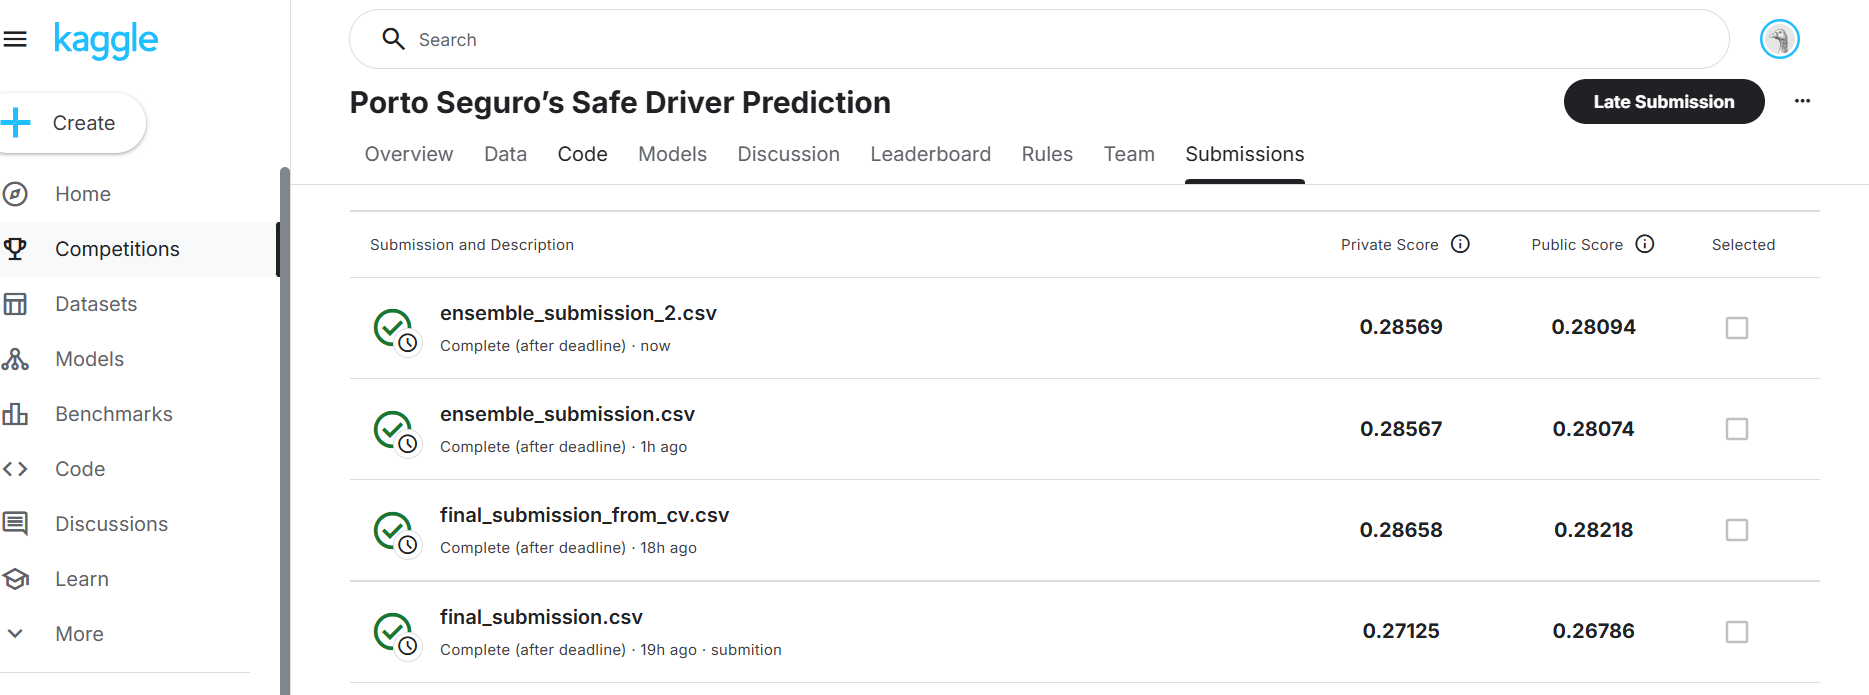

ÏúÑÏóêÏÑúÎ∂ÄÌÑ∞ Ï∞®Î°ÄÎåÄÎ°ú
1. 0.64 : 0.36 Í∞ÄÏ§ëÏπòÍ∞Ä Ï†ÅÏö©Îêú ÏïôÏÉÅÎ∏î Í∏∞Î≤ï
2. 5:5 ÏïôÏÉÅÎ∏î Í∏∞Î≤ï
3. XGBoost Îã®Ïùº Î™®Îç∏
4. LightGBM Îã®Ïùº Î™®Îç∏

- XGBoost Îã®ÏùºÏù¥ Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÎã§.

### Ïä§ÌÉúÌÇπ Í∏∞Î≤ï Ï†ÅÏö©
Ïó¨Îü¨ Í∞úÏùò ÏÑúÎ°ú Îã§Î•∏ Î™®Îç∏(ÏïΩÌïú ÌïôÏäµÍ∏∞, Base Learners)Îì§ÏùÑ Î®ºÏ†Ä ÌïôÏäµÏãúÌÇ® Îí§, Ïù¥ Î™®Îç∏Îì§Ïù¥ ÎÇ∏ ÏòàÏ∏°Í∞íÏùÑ Î™®ÏïÑ ÏµúÏ¢Ö Î©îÌÉÄ Î™®Îç∏(Meta Learner) Ïóê Îã§Ïãú ÌïôÏäµÏãúÌÇ§Îäî Î∞©ÏãùÏù¥ÏóêÏöî.

üìå Íµ¨Ï°∞

1Îã®Í≥Ñ (Base Learner ÌïôÏäµ)

- ÏÑúÎ°ú Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©Ìï¥ Ïó¨Îü¨ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ¥
(Ïòà: ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥, Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, SVM Îì±)

2Îã®Í≥Ñ (Meta Learner ÌïôÏäµ)

- 1Îã®Í≥Ñ Î™®Îç∏Îì§Ïù¥ ÎÇ∏ ÏòàÏ∏° Í≤∞Í≥º(Ï∂úÎ†•Í∞í)Î•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑ Îòê Îã§Î•∏ Î™®Îç∏(Ï£ºÎ°ú Í∞ÑÎã®Ìïú Î™®Îç∏, Ïòà: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä, ÏÑ†Ìòï ÌöåÍ∑Ä Îì±)ÏùÑ ÌïôÏäµÏãúÌÇ¥

ÏµúÏ¢Ö ÏòàÏ∏°

- Î©îÌÉÄ Î™®Îç∏Ïù¥ Base LearnerÎì§Ïùò Í≤∞Í≥ºÎ•º Ï¢ÖÌï©Ìï¥ÏÑú ÏµúÏ¢Ö ÏòàÏ∏°ÏùÑ ÏàòÌñâ

ÌòÑÏû¨Îäî Î™®Îç∏Ïù¥ ÎëêÍ∞úÎ∞ñÏóê ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê, forÎ¨∏ÏùÑ ÎèåÎ†∏Îçò Ïù¥Ï†ÑÍ≥º ÏÑ±Îä•Ïù¥ Í∞ôÏùÄ Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÎã§.

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# ÌååÏùº Í≤ΩÎ°úÎäî Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
try:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
except FileNotFoundError:
    print("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÎîîÎ†âÌÜ†Î¶¨Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    exit()

# 2. ÌîºÏ≤ò(Feature) Î∞è ÌÉÄÍ≤ü(Target) Î∂ÑÎ¶¨
# idÏôÄ target Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Ïª¨ÎüºÏùÑ ÌîºÏ≤òÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
features = [col for col in train.columns if col not in ['id', 'target']]
X_train = train[features]
y_train = train['target']
X_test = test[features]
test_ids = test['id']

# 3. Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏° (ÍµêÏ∞® Í≤ÄÏ¶ù ÏÇ¨Ïö©)
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

# OOF(Out-of-Fold) ÏòàÏ∏°Í∞íÏùÑ Ï†ÄÏû•Ìï† Î∞∞Ïó¥
oof_xgb = np.zeros(len(train))
oof_lgbm = np.zeros(len(train))

# Í∞Å Î™®Îç∏Ïùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î∞∞Ïó¥
xgb_preds = np.zeros(len(X_test))
lgbm_preds = np.zeros(len(X_test))

# Í∞Å Ìè¥ÎìúÏùò Gini Ï†êÏàòÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
gini_scores_xgb = []
gini_scores_lgbm = []

# --- XGBoost Î™®Îç∏ ---
# Ïó¨Í∏∞Ïóê ÌäúÎãùÌïòÏã† XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.
# ÏòàÏãú ÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§.
xgb_best_params = {
    'objective': 'binary:logistic', # Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†ú
    'eval_metric': 'auc',           # ÌèâÍ∞ÄÏßÄÌëú
    'random_state': 42,
    'n_estimators': 2000,
    # GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïãú, Îß§Ïö∞ Îπ†Î•∏ ÌïôÏäµ Í∞ÄÎä•. CPU ÏÇ¨Ïö© Ïãú 'hist' ÎòêÎäî 'auto'
    'device': 'cuda',
    'tree_method': 'hist',
    'learning_rate': 0.01360513985610827,
    'max_depth': 5,
    'subsample': 0.6723083633209394,
    'colsample_bytree': 0.8381085690743174,
    'gamma': 0.7175879330449897,
    'reg_alpha': 0.42338064413698273,
    'reg_lambda': 0.6640984566021599,
    'n_jobs': -1,
    'early_stopping_rounds': 100
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- XGBoost Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = xgb.XGBClassifier(**xgb_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              verbose=False)

    # OOF ÏòàÏ∏°Í∞í Ï†ÄÏû•
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_xgb[val_idx] = val_preds

    # Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï†ÄÏû•
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_xgb.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° (ÌôïÎ•†)
    xgb_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits


# --- LightGBM Î™®Îç∏ ---
# LightGBMÎèÑ ÎπÑÏä∑Ìïú Î∞©ÏãùÏúºÎ°ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
lgbm_best_params = {
    'learning_rate': 0.03420794608326385,
    'num_leaves': 38,
    'max_depth': 7,
    'subsample': 0.6413217568876542,
    'colsample_bytree': 0.7431271817736341,
    'reg_alpha': 0.9236090281863292,
    'reg_lambda': 0.8629905105928004,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_estimators': 2000,
    'n_jobs': -1
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- LightGBM Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = lgb.LGBMClassifier(**lgbm_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              callbacks=[lgb.early_stopping(100, verbose=False)])

    # OOF ÏòàÏ∏°Í∞í Ï†ÄÏû•
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_lgbm[val_idx] = val_preds

    # Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï†ÄÏû•
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_lgbm.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° (ÌôïÎ•†)
    lgbm_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits

# 4. ÏµúÏ¢Ö Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
print("\n" + "="*40)
print(f"XGBoost ÌèâÍ∑† Gini Ï†êÏàò: {np.mean(gini_scores_xgb):.5f}")
print(f"LightGBM ÌèâÍ∑† Gini Ï†êÏàò: {np.mean(gini_scores_lgbm):.5f}")

# ÏïôÏÉÅÎ∏î OOF ÏòàÏ∏°Í∞íÏóê ÎåÄÌïú Gini Ï†êÏàò Í≥ÑÏÇ∞
oof_ensemble = 0.6 * oof_xgb + 0.4 * oof_lgbm
ensemble_gini = 2 * roc_auc_score(y_train, oof_ensemble) - 1
print(f"ÏïôÏÉÅÎ∏î OOF Gini Ï†êÏàò: {ensemble_gini:.5f}")
print("="*40)

# --- 5. Ïä§ÌÉúÌÇπ(Stacking)ÏùÑ ÏúÑÌïú 2Îã®Í≥Ñ(Level 2) Î™®Îç∏ ÌïôÏäµ ---
print("\n" + "="*40)
print("--- Level 2: Î©îÌÉÄ Î™®Îç∏ ÌïôÏäµ ÏãúÏûë ---")

# 1Îã®Í≥Ñ Î™®Îç∏Îì§Ïùò OOF ÏòàÏ∏°Í∞íÏùÑ 2Îã®Í≥Ñ Î™®Îç∏Ïùò 'ÌïôÏäµ Îç∞Ïù¥ÌÑ∞'Î°ú ÏÇ¨Ïö©
# (ÌîºÏ≤òÍ∞Ä 2Í∞úÏù∏ ÏÉàÎ°úÏö¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßåÎì§Ïñ¥ÏßëÎãàÎã§)
X_train_level2 = pd.DataFrame({'xgb': oof_xgb, 'lgbm': oof_lgbm})

# 1Îã®Í≥Ñ Î™®Îç∏Îì§Ïùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°Í∞íÏùÑ 2Îã®Í≥Ñ Î™®Îç∏Ïùò 'ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞'Î°ú ÏÇ¨Ïö©
X_test_level2 = pd.DataFrame({'xgb': xgb_preds, 'lgbm': lgbm_preds})

# Î©îÌÉÄ Î™®Îç∏Î°ú Logistic Regression ÏÇ¨Ïö©
# Logistic RegressionÏùÄ Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ïñ¥ÎñªÍ≤å Ï°∞Ìï©Ìï†ÏßÄ ÌïôÏäµÌï©ÎãàÎã§.
meta_model = LogisticRegression(random_state=42)
meta_model.fit(X_train_level2, y_train)

# Î©îÌÉÄ Î™®Îç∏Ïùò OOF Gini Ï†êÏàò ÌôïÏù∏
meta_oof_preds = meta_model.predict_proba(X_train_level2)[:, 1]
stacking_gini = 2 * roc_auc_score(y_train, meta_oof_preds) - 1
print(f"\nÏä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î OOF Gini Ï†êÏàò: {stacking_gini:.5f}")
print("="*40)


# --- 6. ÏµúÏ¢Ö Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ---
# 2Îã®Í≥Ñ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(X_test_level2)Î°ú ÏµúÏ¢Ö ÏòàÏ∏° ÏÉùÏÑ±
stacking_preds = meta_model.predict_proba(X_test_level2)[:, 1]

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = pd.DataFrame({
    'id': test_ids,
    'target': ensemble_preds
})
submission.to_csv('ensemble_stacking_submission.csv', index=False)

print("\nÏïôÏÉÅÎ∏î ÏôÑÎ£å! 'submission.csv' ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")
print(submission.head())

--- XGBoost Fold 1 ---
Fold 1 Gini: 0.2899901040114363
--- XGBoost Fold 2 ---
Fold 2 Gini: 0.2848810972835045
--- XGBoost Fold 3 ---
Fold 3 Gini: 0.28534190008643967
--- XGBoost Fold 4 ---
Fold 4 Gini: 0.28493408159980405
--- XGBoost Fold 5 ---
Fold 5 Gini: 0.2716616406064343
--- LightGBM Fold 1 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Fold 1 Gini: 0.2889003385199478
--- LightGBM Fold 2 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] 

Í∞úÏÑ†Ï†ê4. ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ( ÌîºÏ≤ò Ï∂îÍ∞Ä )


In [2]:
def add_features(df):
    """Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏÉàÎ°úÏö¥ ÌîºÏ≤òÎ•º Ï∂îÍ∞ÄÌïòÎäî Ìï®Ïàò"""
    df_copy = df.copy()

    # 1. Í≤∞Ï∏°Í∞í Í∞úÏàò ÌîºÏ≤ò
    df_copy['n_missing'] = (df_copy == -1).sum(axis=1)

    # 2. Ïù¥ÏßÑ ÌîºÏ≤ò Ìï©Í≥Ñ
    bin_cols = [col for col in df_copy.columns if '_bin' in col]
    df_copy['bin_features_sum'] = df_copy[bin_cols].sum(axis=1)

    # 3. ÏÉÅÌò∏ÏûëÏö© ÌîºÏ≤ò (ÏòàÏãú)
    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÏπúÍµ¨ÎÅºÎ¶¨ Í≥±Ìïú Í∞í
    df_copy['ps_car_13_x_ps_reg_03'] = df_copy['ps_car_13'] * df_copy['ps_reg_03']
    df_copy['ps_ind_01_x_ps_ind_03'] = df_copy['ps_ind_01'] * df_copy['ps_ind_03']
    df_copy['ps_car_13_x_ps_car_04_cat'] = df_copy['ps_car_13'] * df_copy['ps_car_04_cat']

    return df_copy

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# ÌååÏùº Í≤ΩÎ°úÎäî Ïã§Ï†ú ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
try:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
except FileNotFoundError:
    print("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÎîîÎ†âÌÜ†Î¶¨Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    exit()

# Feature ÏóîÏßÄÎãàÏñ¥ÎßÅ
print("ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
train = add_features(train)
test = add_features(test)
print("ÏÉàÎ°úÏö¥ ÌîºÏ≤òÍ∞Ä Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§.")

# 2. ÌîºÏ≤ò(Feature) Î∞è ÌÉÄÍ≤ü(Target) Î∂ÑÎ¶¨
# idÏôÄ target Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Ïª¨ÎüºÏùÑ ÌîºÏ≤òÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
features = [col for col in train.columns if col not in ['id', 'target']]
X_train = train[features]
y_train = train['target']
X_test = test[features]
test_ids = test['id']

# 3. Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏° (ÍµêÏ∞® Í≤ÄÏ¶ù ÏÇ¨Ïö©)
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

# OOF(Out-of-Fold) ÏòàÏ∏°Í∞íÏùÑ Ï†ÄÏû•Ìï† Î∞∞Ïó¥
oof_xgb = np.zeros(len(train))
oof_lgbm = np.zeros(len(train))

# Í∞Å Î™®Îç∏Ïùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î∞∞Ïó¥
xgb_preds = np.zeros(len(X_test))
lgbm_preds = np.zeros(len(X_test))

# Í∞Å Ìè¥ÎìúÏùò Gini Ï†êÏàòÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
gini_scores_xgb = []
gini_scores_lgbm = []

# --- XGBoost Î™®Îç∏ ---
# Ïó¨Í∏∞Ïóê ÌäúÎãùÌïòÏã† XGBoost ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.
# ÏòàÏãú ÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§.
xgb_best_params = {
    'objective': 'binary:logistic', # Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†ú
    'eval_metric': 'auc',           # ÌèâÍ∞ÄÏßÄÌëú
    'random_state': 42,
    'n_estimators': 2000,
    # GPU ÏÇ¨Ïö© Í∞ÄÎä• Ïãú, Îß§Ïö∞ Îπ†Î•∏ ÌïôÏäµ Í∞ÄÎä•. CPU ÏÇ¨Ïö© Ïãú 'hist' ÎòêÎäî 'auto'
    'device': 'cuda',
    'tree_method': 'hist',
    'learning_rate': 0.01360513985610827,
    'max_depth': 5,
    'subsample': 0.6723083633209394,
    'colsample_bytree': 0.8381085690743174,
    'gamma': 0.7175879330449897,
    'reg_alpha': 0.42338064413698273,
    'reg_lambda': 0.6640984566021599,
    'n_jobs': -1,
    'early_stopping_rounds': 100
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- XGBoost Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = xgb.XGBClassifier(**xgb_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              verbose=False)

    # OOF ÏòàÏ∏°Í∞í Ï†ÄÏû•
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_xgb[val_idx] = val_preds

    # Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï†ÄÏû•
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_xgb.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° (ÌôïÎ•†)
    xgb_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits


# --- LightGBM Î™®Îç∏ ---
# LightGBMÎèÑ ÎπÑÏä∑Ìïú Î∞©ÏãùÏúºÎ°ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.
lgbm_best_params = {
    'learning_rate': 0.03420794608326385,
    'num_leaves': 38,
    'max_depth': 7,
    'subsample': 0.6413217568876542,
    'colsample_bytree': 0.7431271817736341,
    'reg_alpha': 0.9236090281863292,
    'reg_lambda': 0.8629905105928004,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_estimators': 2000,
    'n_jobs': -1
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- LightGBM Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = lgb.LGBMClassifier(**lgbm_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              callbacks=[lgb.early_stopping(100, verbose=False)])

    # OOF ÏòàÏ∏°Í∞í Ï†ÄÏû•
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_lgbm[val_idx] = val_preds

    # Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï†ÄÏû•
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_lgbm.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° (ÌôïÎ•†)
    lgbm_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits

# 4. ÏµúÏ¢Ö Gini Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
print("\n" + "="*40)
print(f"XGBoost ÌèâÍ∑† Gini Ï†êÏàò: {np.mean(gini_scores_xgb):.5f}")
print(f"LightGBM ÌèâÍ∑† Gini Ï†êÏàò: {np.mean(gini_scores_lgbm):.5f}")

# ÏïôÏÉÅÎ∏î OOF ÏòàÏ∏°Í∞íÏóê ÎåÄÌïú Gini Ï†êÏàò Í≥ÑÏÇ∞
oof_ensemble = 0.6 * oof_xgb + 0.4 * oof_lgbm
ensemble_gini = 2 * roc_auc_score(y_train, oof_ensemble) - 1
print(f"ÏïôÏÉÅÎ∏î OOF Gini Ï†êÏàò: {ensemble_gini:.5f}")
print("="*40)

# --- 5. Ïä§ÌÉúÌÇπ(Stacking)ÏùÑ ÏúÑÌïú 2Îã®Í≥Ñ(Level 2) Î™®Îç∏ ÌïôÏäµ ---
print("\n" + "="*40)
print("--- Level 2: Î©îÌÉÄ Î™®Îç∏ ÌïôÏäµ ÏãúÏûë ---")

# 1Îã®Í≥Ñ Î™®Îç∏Îì§Ïùò OOF ÏòàÏ∏°Í∞íÏùÑ 2Îã®Í≥Ñ Î™®Îç∏Ïùò 'ÌïôÏäµ Îç∞Ïù¥ÌÑ∞'Î°ú ÏÇ¨Ïö©
# (ÌîºÏ≤òÍ∞Ä 2Í∞úÏù∏ ÏÉàÎ°úÏö¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßåÎì§Ïñ¥ÏßëÎãàÎã§)
X_train_level2 = pd.DataFrame({'xgb': oof_xgb, 'lgbm': oof_lgbm})

# 1Îã®Í≥Ñ Î™®Îç∏Îì§Ïùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°Í∞íÏùÑ 2Îã®Í≥Ñ Î™®Îç∏Ïùò 'ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞'Î°ú ÏÇ¨Ïö©
X_test_level2 = pd.DataFrame({'xgb': xgb_preds, 'lgbm': lgbm_preds})

# Î©îÌÉÄ Î™®Îç∏Î°ú Logistic Regression ÏÇ¨Ïö©
# Logistic RegressionÏùÄ Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ïñ¥ÎñªÍ≤å Ï°∞Ìï©Ìï†ÏßÄ ÌïôÏäµÌï©ÎãàÎã§.
meta_model = LogisticRegression(random_state=42)
meta_model.fit(X_train_level2, y_train)

# Î©îÌÉÄ Î™®Îç∏Ïùò OOF Gini Ï†êÏàò ÌôïÏù∏
meta_oof_preds = meta_model.predict_proba(X_train_level2)[:, 1]
stacking_gini = 2 * roc_auc_score(y_train, meta_oof_preds) - 1
print(f"\nÏä§ÌÉúÌÇπ ÏïôÏÉÅÎ∏î OOF Gini Ï†êÏàò: {stacking_gini:.5f}")
print("="*40)


# --- 6. ÏµúÏ¢Ö Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ---
# 2Îã®Í≥Ñ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(X_test_level2)Î°ú ÏµúÏ¢Ö ÏòàÏ∏° ÏÉùÏÑ±
stacking_preds = meta_model.predict_proba(X_test_level2)[:, 1]

# 7. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = pd.DataFrame({
    'id': test_ids,
    'target': stacking_preds
})
submission.to_csv('ensemble_stacking_with_new_feature_submission.csv', index=False)

print("\nÏïôÏÉÅÎ∏î ÏôÑÎ£å! 'submission.csv' ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")
print(submission.head())

ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
ÏÉàÎ°úÏö¥ ÌîºÏ≤òÍ∞Ä Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§.
--- XGBoost Fold 1 ---
Fold 1 Gini: 0.2910628552597285
--- XGBoost Fold 2 ---
Fold 2 Gini: 0.2836987962499291
--- XGBoost Fold 3 ---
Fold 3 Gini: 0.2853349786691728
--- XGBoost Fold 4 ---
Fold 4 Gini: 0.284231233320539
--- XGBoost Fold 5 ---
Fold 5 Gini: 0.27284520974263105
--- LightGBM Fold 1 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Fold 1 Gini: 0.2879833214445269
--- LightGBM Fold 2 -

- Ïò§ÌûàÎ†§ ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ï°åÎã§...
- ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùò Í∏∏ÏùÄ Î©ÄÎã§